In [56]:
#https://www.kaggle.com/datasets/altavish/boston-housing-dataset/data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import requests

# shared link
shared_link = 'https://drive.google.com/file/d/1jjxyBk2iBGEu8rJ5zyuTDgjqGoWPMWE6/view?usp=drive_link'

# Extract the file ID from the shared link
file_id = shared_link.split('/')[-2]
download_link = f'https://drive.google.com/uc?export=download&id={file_id}'

# Download the data set
response = requests.get(download_link)

# Save the Data temporarily (you can delete it later)
with open('BostonHousing.csv', 'wb') as f:
    f.write(response.content)

df=pd.read_csv('BostonHousing.csv')

print(df)


if df is None:
    print("Error: Could not load the data. Please check the file path or shared link.")

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [57]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [58]:
df.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [59]:

Null_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']

# Fill NaN values in these columns with the mean of the column
df[Null_columns] = df[Null_columns].fillna(df[Null_columns].median())


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


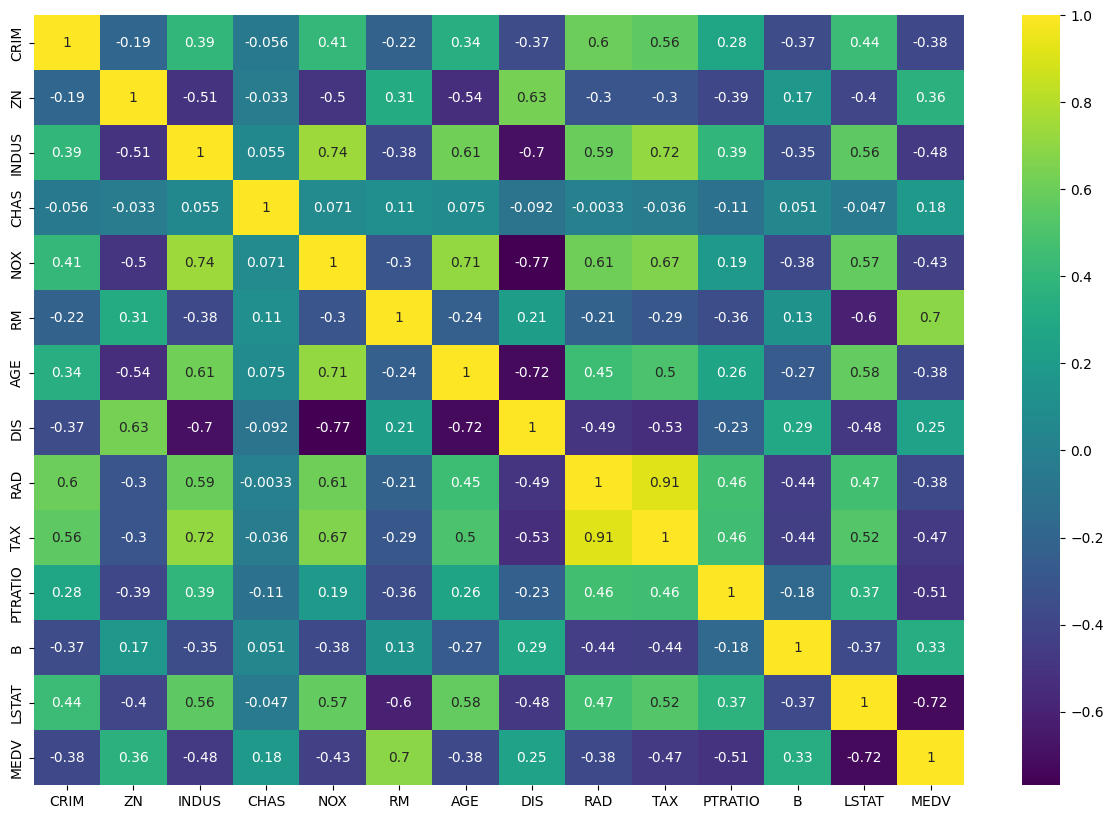

In [61]:
#heatmap
corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,cmap="viridis", annot=True)
plt.show()

In [62]:
corr_matrix_medv = df.corr()["MEDV"]

#correlation with target variable
target_corr = np.abs(df.corrwith(df["MEDV"]))#finding absolute
print(target_corr.sort_values(ascending=False)) #printing in descending order

MEDV       1.000000
LSTAT      0.723093
RM         0.695360
PTRATIO    0.507787
INDUS      0.476394
TAX        0.468536
NOX        0.427321
CRIM       0.383895
RAD        0.381626
AGE        0.377572
ZN         0.362292
B          0.333461
DIS        0.249929
CHAS       0.183844
dtype: float64


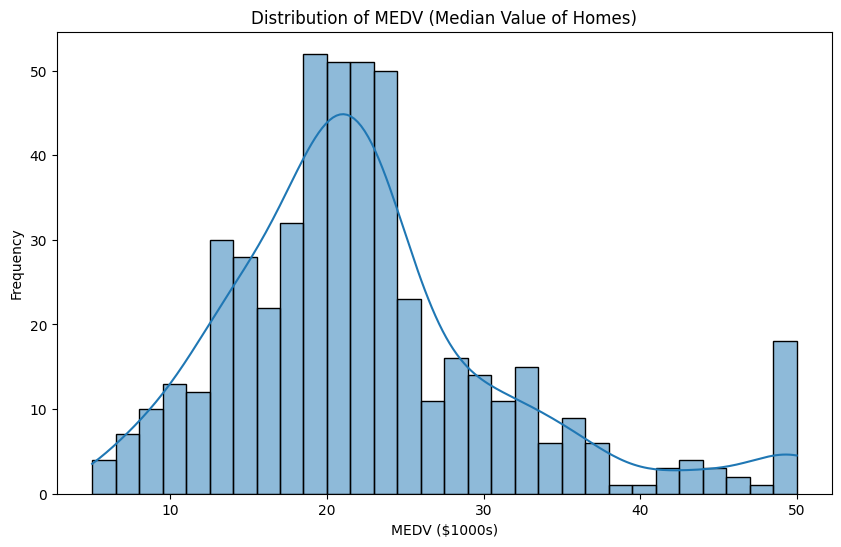

In [63]:
# Visualize the distribution of the target variable (MEDV)
plt.figure(figsize=(10, 6))
sns.histplot(df['MEDV'], bins=30, kde=True)
plt.title('Distribution of MEDV (Median Value of Homes)')
plt.xlabel('MEDV ($1000s)')
plt.ylabel('Frequency')
plt.show()

In [64]:
#dropping unnecessary columns
df.drop(["CHAS","DIS"], axis=1, inplace=True)

## **Splitting the data**

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#splitting the data into training and testing sets
X = df.drop(["MEDV"], axis=1) #all attributes except the dependent
y = df["MEDV"] #dependent attribute
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


#feature scaling is import before training any data
scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)#fit_transform is used on training data
X_test_scaled = scaler.transform(X_test)

## **Regression Models**

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor


linear_model = LinearRegression()
tree_model = DecisionTreeRegressor(random_state=42)
knn_model = KNeighborsRegressor(n_neighbors=5)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# **Regression evaluation metrics**

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error
def calculate_metrics(y_true, y_pred):
    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_true, y_pred)

    # Mean Squared Error (MSE)
    mse = mean_squared_error(y_true, y_pred)

    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)

    # R-squared (R²)
    r2 = r2_score(y_true, y_pred)

    # Adjusted R-squared
    n = len(y_true)
    p = X_test_scaled.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    # Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # Handle cases where MSLE might not be applicable
    if (y_true >= 0).all() and (y_pred >= 0).all():
        # Mean Squared Logarithmic Error (MSLE)
        msle = mean_squared_log_error(y_true, y_pred)
    else:
        msle = "Not Applicable (Negative Values)"

    # Huber Loss
    delta = 1.0  # You can adjust the delta parameter as needed
    huber_loss = np.mean(np.where(np.abs(y_true - y_pred) < delta, 0.5 * (y_true - y_pred) ** 2, delta * (np.abs(y_true - y_pred) - 0.5 * delta)))

    return {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2,
        "Adjusted R2": adjusted_r2,
        "MAPE": mape,
        "MSLE": msle,
        "Huber Loss": huber_loss
    }

# **Training And Testing**

In [68]:


lst_models=[linear_model,tree_model,knn_model,rf_regressor]
for i in lst_models:
    print("model: " + str(i))
    i.fit(X_train_scaled, y_train)
    y_pred=i.predict(X_test_scaled)
    re_metrics = calculate_metrics(y_test, y_pred)
    print("Regression evaluation metrics :")
    for metric, value in re_metrics.items():
       print(f"{metric}: {value}")

    print("---------------")

model: LinearRegression()
Regression evaluation metrics :
MAE: 4.165080668623964
MSE: 39.9604873896491
RMSE: 6.321430802409301
R2: 0.5092563746767584
Adjusted R2: 0.4492765982483622
MAPE: 19.92721057232833
MSLE: Not Applicable (Negative Values)
Huber Loss: 3.6983286683571985
---------------
model: DecisionTreeRegressor(random_state=42)
Regression evaluation metrics :
MAE: 3.242156862745097
MSE: 27.25186274509804
RMSE: 5.220331670028068
R2: 0.6653274573471555
Adjusted R2: 0.6244230354673633
MAPE: 14.414776377267527
MSLE: 0.03864220550626546
Huber Loss: 2.7800490196078425
---------------
model: KNeighborsRegressor()
Regression evaluation metrics :
MAE: 3.552549019607842
MSE: 37.08167058823529
RMSE: 6.089472110801994
R2: 0.5446103226902458
Adjusted R2: 0.48895158435238695
MAPE: 15.573949744457567
MSLE: 0.054023153940739886
Huber Loss: 3.098972549019607
---------------
model: RandomForestRegressor(random_state=42)
Regression evaluation metrics :
MAE: 2.832362745098042
MSE: 26.1956065000000

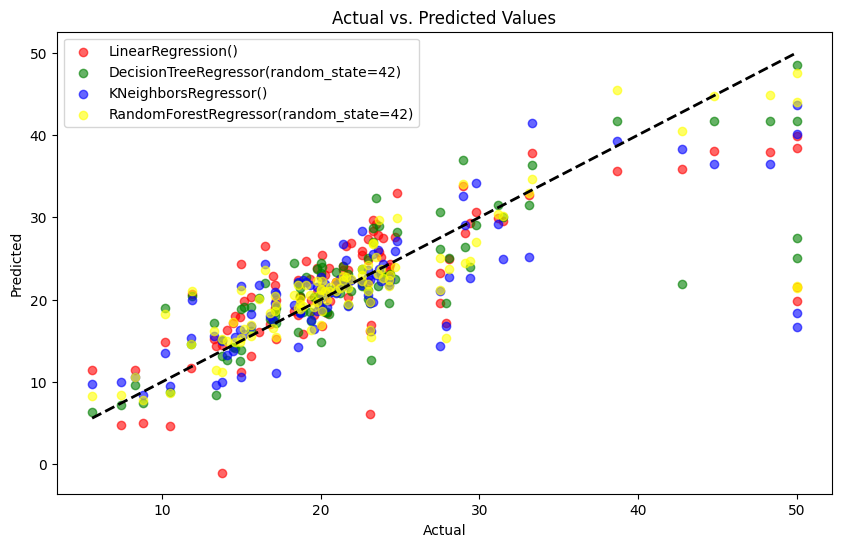

In [69]:
# Plot Actual vs. Predicted values
colors = ["Red", "Green", "Blue", "Yellow"]
plt.figure(figsize=(10,6))
for x, model in enumerate(lst_models):
    y_pred = model.predict(X_test_scaled)
    plt.scatter(y_test, y_pred, alpha=0.6,color=colors[x], label=str(model))


plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.legend()

plt.show()

# **Predicting new values**

In [53]:
# Function to predict new values
def predict_with_model(model, new_x_test):
    predictions = model.predict(new_x_test)
    return predictions

In [70]:
custom_input = pd.DataFrame({
    'CRIM': [0.147],
    'ZN':[2],
    'INDUS': [8.50],
    'NOX': [0.53],
    'RM': [6.728],
    'AGE': [79.5],
    'RAD': [5],
    'TAX': [385],
    'PTRATIO':[20.9],
    'B':[395.0],
    'LSTAT':[9.42]
})
# scale the input values using the same scaling parameters as the training set
custom_input_scaled = scaler.transform(custom_input)



for i in lst_models:
    predictions = predict_with_model(i, custom_input_scaled)
    print("Predictions for new data:"+ str(i), predictions)

Predictions for new data:LinearRegression() [23.14064827]
Predictions for new data:DecisionTreeRegressor(random_state=42) [26.2]
Predictions for new data:KNeighborsRegressor() [21.06]
Predictions for new data:RandomForestRegressor(random_state=42) [24.989]
